# Problem Statement="Airline Service Customer Satisfied OR Dissatisfied"

In [1]:
#https://github.com/Pathadeyogita/airline-service-satisfaction

In [2]:
#LIBRARIES
import numpy as np                                   #Linear algebra  #used for working with arrays
import pandas as pd                                  #Analyze data.learning by reading
import matplotlib.pyplot as plt                      #Data Visuallization
import seaborn as sns                                #data visuallization library based on matplotlib
from sklearn.preprocessing import LabelEncoder       #Converts categorical column into numerical column
le=LabelEncoder()                                    #creating alias
import warnings                                      #It ignores the warnings
warnings.filterwarnings('ignore')

# Read csv File

In [3]:
data=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\project files edu\archive (8)\Invistico_Airline.csv")
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Drop Column

In [4]:
data=data.drop(["Gender"],axis=1)

# Rename Column

In [5]:
data=data.rename(columns={"Arrival Delay in Minutes":"Arrival_Delay","Customer Type":"CustomerType","satisfaction":"Satisfaction","On-board service":"On_board_service","Checkin service":"Checkin_service","Flight Distance":"Flight_Distance","Type of Travel":"Type_of_Travel"})

# Check Shape

In [6]:
data.shape

(129880, 22)

In [7]:
data.Satisfaction.value_counts()

satisfied       71087
dissatisfied    58793
Name: Satisfaction, dtype: int64

In [8]:
#data.Arrival_Delay.value_counts()

# Checking Null Values

In [9]:
data.isnull().sum()

Satisfaction                           0
CustomerType                           0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On_board_service                       0
Leg room service                       0
Baggage handling                       0
Checkin_service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival_Delay                        393
dtype: int64

In [10]:
data.dtypes

Satisfaction                          object
CustomerType                          object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On_board_service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival_Delay                        float64
dtype: obj

# missing value treatment

In [11]:
data.Arrival_Delay=data.Arrival_Delay.fillna(data.Arrival_Delay.mean())



In [12]:
data.isnull().sum()

Satisfaction                         0
CustomerType                         0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On_board_service                     0
Leg room service                     0
Baggage handling                     0
Checkin_service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival_Delay                        0
dtype: int64

# Convert categerical into numerical(using LabelEncoder)

In [13]:
#convert categerical into numerical
data.Satisfaction=le.fit_transform(data.Satisfaction)
data.CustomerType=le.fit_transform(data.CustomerType)
data.Class=le.fit_transform(data.Class)
data.Type_of_Travel=le.fit_transform(data.Type_of_Travel)

# Data Spliting

In [14]:
data_x=data.iloc[:,1:22]
data_y=data.iloc[:,-22]

In [15]:
data_y.head()

0    1
1    1
2    1
3    1
4    1
Name: Satisfaction, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((103904, 21), (25976, 21), (103904,), (25976,))

# Base Model on data to check performance

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [20]:
lg.fit(x_train,y_train)

LogisticRegression()

In [21]:
lg_pred=lg.predict(x_test)
lg_pred


array([1, 1, 1, ..., 0, 1, 1])

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
m1=confusion_matrix(lg_pred,y_test)
m1

array([[ 8134,  2224],
       [ 3795, 11823]], dtype=int64)

In [24]:
lg_acc=m1.diagonal().sum()/m1.sum()*100
lg_acc

76.82861102556205

In [25]:
print(classification_report(lg_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73     10358
           1       0.84      0.76      0.80     15618

    accuracy                           0.77     25976
   macro avg       0.76      0.77      0.76     25976
weighted avg       0.78      0.77      0.77     25976



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dt_pred=dt.predict(x_test)
dt_pred

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
m2=confusion_matrix(dt_pred,y_test)
m2

array([[11053,   834],
       [  876, 13213]], dtype=int64)

In [30]:
dt_acc=m2.diagonal().sum()/m2.sum()*100
dt_acc


93.4170003079766

In [31]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11887
           1       0.94      0.94      0.94     14089

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



# Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
rf_pred=rf.predict(x_test)
rf_pred

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
m3=confusion_matrix(rf_pred,y_test)
m3

array([[11466,   694],
       [  463, 13353]], dtype=int64)

In [36]:
rf_acc=m3.diagonal().sum()/m3.sum()*100
rf_acc


95.54588851247306

In [37]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     12160
           1       0.95      0.97      0.96     13816

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# Boosting 

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [40]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [41]:
ab_pred=ab.predict(x_test)
ab_pred

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
m4=confusion_matrix(ab_pred,y_test)
m4

array([[11072,   837],
       [  857, 13210]], dtype=int64)

In [43]:
acc_ab=m4.diagonal().sum()/m4.sum()*100
acc_ab

93.47859562673236

In [44]:
print(classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11909
           1       0.94      0.94      0.94     14067

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



# XG Boost

In [45]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [46]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
xg_pred=xg.predict(x_test)
xg_pred

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
m5=confusion_matrix(xg_pred,y_test)
m5

array([[11477,   656],
       [  452, 13391]], dtype=int64)

In [49]:
acc_xg=m5.diagonal().sum()/m5.sum()*100
acc_xg

95.73452417616262

In [50]:
print(classification_report(xg_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     12133
           1       0.95      0.97      0.96     13843

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



#  KNN     

In [51]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=20)

In [52]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [53]:
kn_pred=kn.predict(x_test)
kn_pred

array([1, 1, 1, ..., 0, 0, 0])

In [54]:
m6=confusion_matrix(kn_pred,y_test)
m6

array([[ 8045,  3901],
       [ 3884, 10146]], dtype=int64)

In [55]:
kn_acc=m6.diagonal().sum()/m6.sum()*100
kn_acc


70.03002771789343

In [56]:
print(classification_report(kn_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     11946
           1       0.72      0.72      0.72     14030

    accuracy                           0.70     25976
   macro avg       0.70      0.70      0.70     25976
weighted avg       0.70      0.70      0.70     25976



In [57]:
l=list()
l

[]

In [58]:
for i in range (1,100):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    kn_pred=kn.predict(x_test)
    c=confusion_matrix(kn_pred,y_test)
    acc=c.diagonal().sum()/c.sum()*100
    l.append(acc)

In [59]:
import matplotlib.pyplot as plt

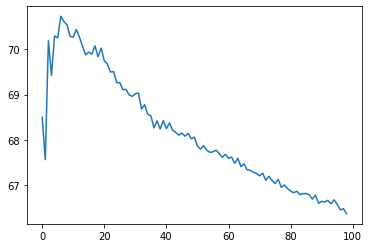

In [60]:
p=plt.plot(l)

# SVM(Support Vector Machine)

In [61]:
from sklearn.svm import SVC
svc=SVC()

In [62]:
svc.fit(x_train,y_train)

SVC()

In [63]:
svc_pred=svc.predict(x_test)
svc_pred

array([1, 1, 1, ..., 1, 0, 0])

In [64]:
m7=confusion_matrix(svc_pred,y_test)
m7

array([[7981, 6048],
       [3948, 7999]], dtype=int64)

In [65]:
acc_svc=m7.diagonal().sum()/m7.sum()*100
acc_svc

61.518324607329845

In [66]:
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.57      0.61     14029
           1       0.57      0.67      0.62     11947

    accuracy                           0.62     25976
   macro avg       0.62      0.62      0.62     25976
weighted avg       0.62      0.62      0.62     25976



# Naivy Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [68]:
nb.fit(x_train,y_train)

MultinomialNB()

In [69]:
nb_pred=nb.predict(x_test)
nb_pred

array([1, 1, 1, ..., 1, 1, 0])

In [70]:
m8=confusion_matrix(nb_pred,y_test)
m8

array([[ 3615,  2502],
       [ 8314, 11545]], dtype=int64)

In [71]:
acc_nb=m8.diagonal().sum()/m8.sum()*100
acc_nb

58.3615645210964

In [72]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.30      0.59      0.40      6117
           1       0.82      0.58      0.68     19859

    accuracy                           0.58     25976
   macro avg       0.56      0.59      0.54     25976
weighted avg       0.70      0.58      0.61     25976



In [73]:
#From the base model we can conclude that accuracy of
#logistic regression=76.82%
#decision tree=93.41%
#random forest=95.54%
#boosting=93.47%
#xgboost=95.73%
#SVM=61.51%
#KNN=70.03%
#NAIVE BAYES=58.36


#  Model Using Class Imbalance Technique

In [74]:
data.Satisfaction.value_counts()

1    71087
0    58793
Name: Satisfaction, dtype: int64

# Random Undersampling

In [75]:
c_1,c_0=data["Satisfaction"].value_counts()
c_1,c_0

(71087, 58793)

In [76]:
data_1=data[data["Satisfaction"]==1]
data_0=data[data["Satisfaction"]==0]

In [77]:
data_1.shape,data_0.shape

((71087, 22), (58793, 22))

In [78]:
class_1under=data_1.sample(c_0)

In [79]:
class1_0=pd.concat([class_1under,data_0],axis=0)

In [80]:
class1_0.shape

(117586, 22)

In [81]:
class1_0.Satisfaction.value_counts()

1    58793
0    58793
Name: Satisfaction, dtype: int64

In [82]:
n_x=class1_0.iloc[:,1:22]
n_y=class1_0.iloc[:,-22]

In [83]:
n_x.head()

,CustomerType,Age,Type_of_Travel,Class,Flight_Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On_board_service,Leg room service,Baggage handling,Checkin_service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival_Delay
87666,0,43,0,0,2327,2,2,2,2,2,...,4,3,3,4,3,5,3,3,1,0.0
110143,0,43,0,0,2220,4,4,4,4,5,...,4,5,5,4,5,5,5,3,0,0.0
123398,0,39,0,0,3095,2,2,2,2,4,...,5,5,5,5,5,5,5,4,15,12.0
104701,0,44,0,1,1826,4,4,4,4,4,...,4,4,2,2,1,1,5,4,0,0.0
13268,0,59,1,1,493,3,3,3,3,5,...,4,4,4,4,4,4,4,3,4,0.0


In [84]:
n1x_train,n1x_test,n1y_train,n1y_test=train_test_split(n_x,n_y,test_size=0.2,random_state=100)

In [85]:
n1x_train.shape,n1x_test.shape,n1y_train.shape,n1y_test.shape

((94068, 21), (23518, 21), (94068,), (23518,))

# EDA(Exploratory Data Analysis)

In [86]:
data1=data.corr()
data1

,Satisfaction,CustomerType,Age,Type_of_Travel,Class,Flight_Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On_board_service,Leg room service,Baggage handling,Checkin_service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival_Delay
Satisfaction,1.000000,-0.292592,0.117971,-0.109239,-0.278932,-0.039224,0.242384,-0.015507,0.120677,-0.012071,...,0.390143,0.431772,0.352047,0.304928,0.260347,0.266179,0.259330,0.338147,-0.073909,-0.080567
CustomerType,-0.292592,1.000000,-0.284172,-0.308236,0.042994,0.018938,-0.042845,-0.186053,-0.048725,-0.000522,...,-0.186154,-0.149664,-0.085433,-0.097179,-0.000639,-0.044353,-0.002333,-0.106394,0.003859,0.004724
Age,0.117971,-0.284172,1.000000,-0.044808,-0.116921,-0.249625,0.008784,0.039055,0.015749,-0.000547,...,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011229
Type_of_Travel,-0.109239,-0.308236,-0.044808,1.000000,0.486718,-0.122762,0.016839,0.191525,-0.031751,-0.013801,...,-0.039385,-0.025790,0.035899,0.013896,0.048421,0.057253,0.058405,-0.009368,-0.005913,-0.005820
Class,-0.278932,0.042994,-0.116921,0.486718,1.000000,-0.154065,0.035022,0.054518,-0.042236,0.002806,...,-0.168457,-0.121663,-0.165430,-0.125318,-0.129086,-0.138172,-0.122513,-0.093906,0.009530,0.014141
Flight_Distance,-0.039224,0.018938,-0.249625,-0.122762,-0.154065,1.000000,-0.042409,0.001350,-0.004649,-0.002409,...,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109912
Seat comfort,0.242384,-0.042845,0.008784,0.016839,0.035022,-0.042409,1.000000,0.434951,0.715997,0.405300,...,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025465
Departure/Arrival time convenient,-0.015507,-0.186053,0.039055,0.191525,0.054518,0.001350,0.434951,1.000000,0.527381,0.544259,...,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002595
Food and drink,0.120677,-0.048725,0.015749,-0.031751,-0.042236,-0.004649,0.715997,0.527381,1.000000,0.523328,...,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014857
Gate location,-0.012071,-0.000522,-0.000547,-0.013801,0.002806,-0.002409,0.405300,0.544259,0.523328,1.000000,...,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003634


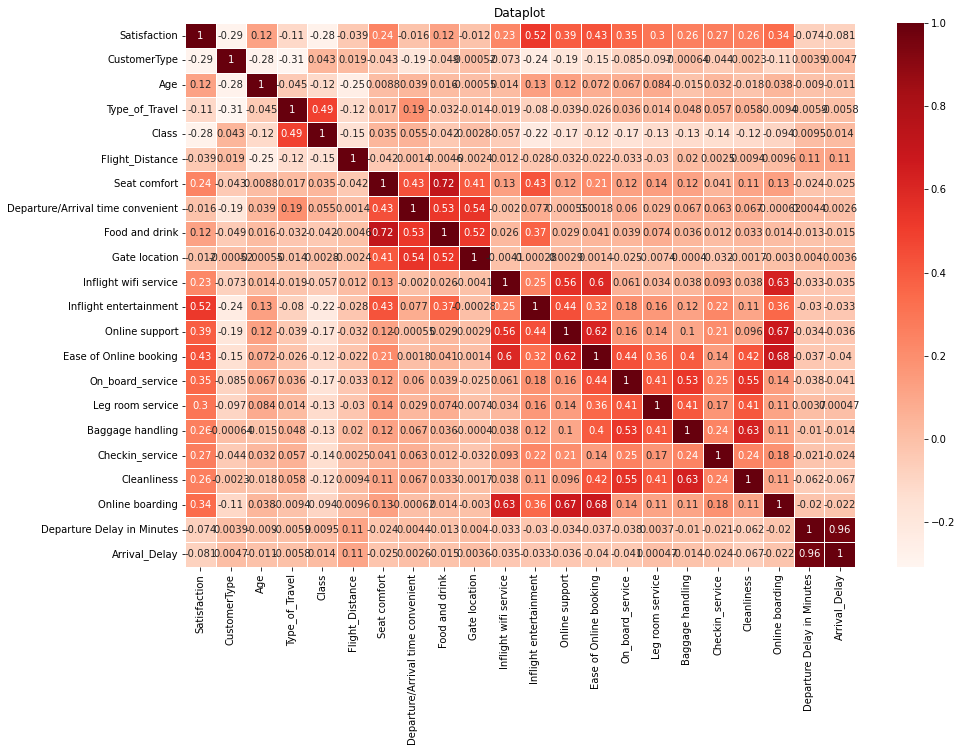

In [87]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data1,linewidth=1,annot=True,cmap=plt.cm.Reds)
plt.title("Dataplot")
plt.show()

<AxesSubplot:>

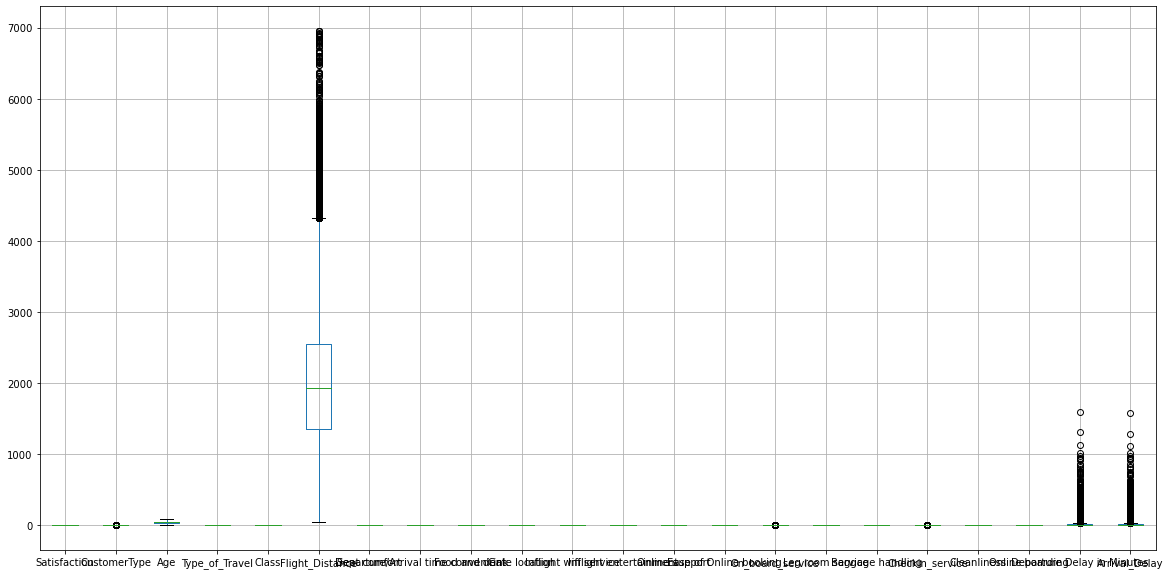

In [88]:
data.boxplot(figsize=(20,10))

# Outlier Treatment(applicable for numerical columns)

<AxesSubplot:>

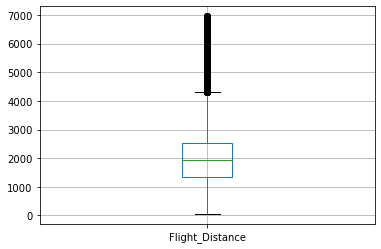

In [89]:
#Flight_Distance
data.boxplot(column="Flight_Distance")

In [90]:
data.Flight_Distance.describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight_Distance, dtype: float64

<AxesSubplot:>

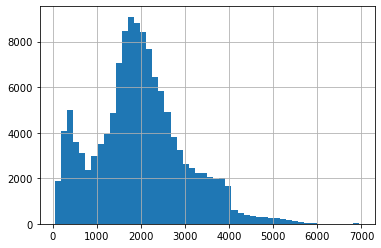

In [91]:
data.Flight_Distance.hist(bins=50)

<AxesSubplot:xlabel='Flight_Distance', ylabel='Density'>

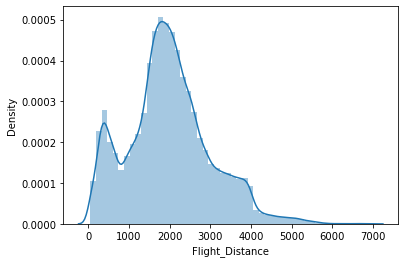

In [92]:
sns.distplot(data["Flight_Distance"])

In [93]:
iqr1=data.Flight_Distance.quantile(0.75)-data.Flight_Distance.quantile(0.25)
iqr1

1185.0

In [94]:
u1=data["Flight_Distance"].quantile(0.75)+3*iqr1
l1=data["Flight_Distance"].quantile(0.25)-3*iqr1
print(u1,l1)

6099.0 -2196.0


In [95]:
data.loc[data["Flight_Distance"]>6099,"Flight_Distance"]=6099

<AxesSubplot:>

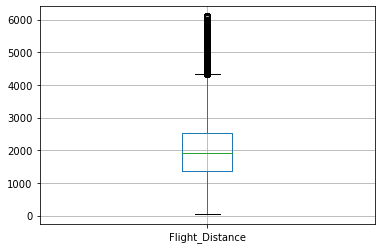

In [96]:
data.boxplot(column="Flight_Distance")

<AxesSubplot:>

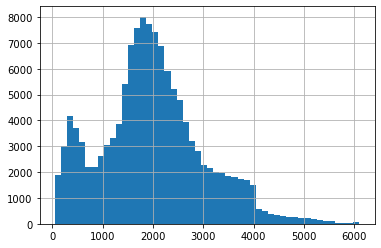

In [97]:
data.Flight_Distance.hist(bins=50)

<AxesSubplot:xlabel='Flight_Distance', ylabel='Density'>

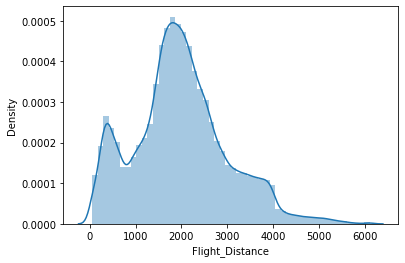

In [98]:
sns.distplot(data["Flight_Distance"])

<AxesSubplot:>

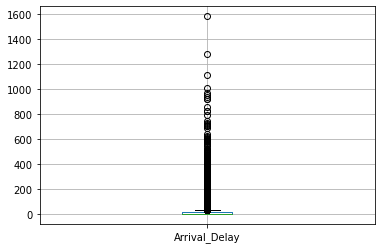

In [99]:
#Arrival_Delay
data.boxplot(column="Arrival_Delay")

In [100]:
data.Arrival_Delay.describe()

count    129880.000000
mean         15.091129
std          38.407410
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival_Delay, dtype: float64

<AxesSubplot:>

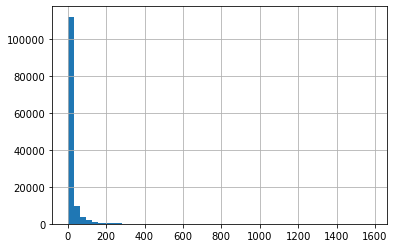

In [101]:
data.Arrival_Delay.hist(bins=50)

<AxesSubplot:xlabel='Arrival_Delay', ylabel='Density'>

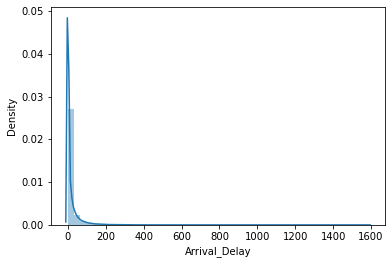

In [102]:
sns.distplot(data["Arrival_Delay"])

In [103]:
iqr2=data.Arrival_Delay.quantile(0.75)-data.Arrival_Delay.quantile(0.25)
iqr2


13.0

In [104]:
u2=data["Arrival_Delay"].quantile(0.75)+3*iqr2
l2=data["Arrival_Delay"].quantile(0.25)-3*iqr2
print(u2,l2)

52.0 -39.0


In [105]:
data.loc[data["Arrival_Delay"]>52,"Arrival_Delay"]=52

<AxesSubplot:>

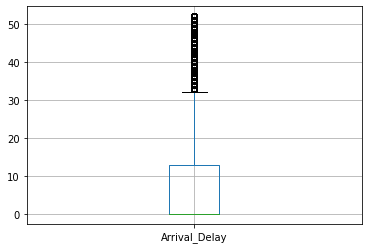

In [106]:
data.boxplot(column="Arrival_Delay")

<AxesSubplot:>

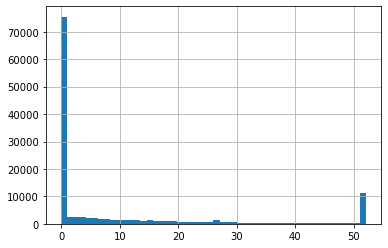

In [107]:
data.Arrival_Delay.hist(bins=50)

<AxesSubplot:xlabel='Arrival_Delay', ylabel='Density'>

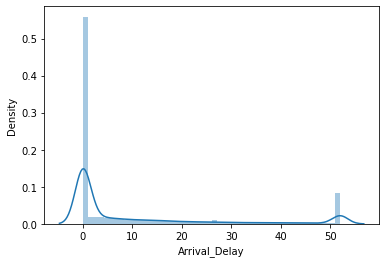

In [108]:
sns.distplot(data["Arrival_Delay"])

# Skewness

In [109]:
data.skew()

Satisfaction                        -0.190169
CustomerType                         1.638879
Age                                 -0.003606
Type_of_Travel                       0.824595
Class                                0.547243
Flight_Distance                      0.456859
Seat comfort                        -0.091861
Departure/Arrival time convenient   -0.252282
Food and drink                      -0.116813
Gate location                       -0.053064
Inflight wifi service               -0.191123
Inflight entertainment              -0.604828
Online support                      -0.575365
Ease of Online booking              -0.491720
On_board_service                    -0.505270
Leg room service                    -0.496440
Baggage handling                    -0.743037
Checkin_service                     -0.392442
Cleanliness                         -0.756001
Online boarding                     -0.366496
Departure Delay in Minutes           6.821980
Arrival_Delay                     

In [110]:
data["Arrival_Delay"].skew()

1.6292085596757353

In [111]:
data["Arrival_Delay"]=np.sqrt(data["Arrival_Delay"])


In [112]:
data["Arrival_Delay"].skew()

0.9924190646541331

# APPLYING VARIOUS TECHNIQUES USING RANDOM UNDERSAMPLING

# Logistic Regression

In [113]:
lg.fit(n1x_train,n1y_train)

LogisticRegression()

In [114]:
lg_pred=lg.predict(n1x_test)
lg_pred


array([1, 0, 0, ..., 1, 1, 1])

In [115]:
c_lg=confusion_matrix(lg_pred,n1y_test)
c_lg

array([[8500, 2409],
       [3325, 9284]], dtype=int64)

In [116]:
lg_acc=c_lg.diagonal().sum()/c_lg.sum()*100
lg_acc

75.61867505740284

In [117]:
print(classification_report(lg_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10909
           1       0.79      0.74      0.76     12609

    accuracy                           0.76     23518
   macro avg       0.76      0.76      0.76     23518
weighted avg       0.76      0.76      0.76     23518



# Decision Tree

In [118]:
dt.fit(n1x_train,n1y_train)

DecisionTreeClassifier()

In [119]:
dt_pred=dt.predict(n1x_test)
dt_pred

array([1, 0, 0, ..., 0, 0, 1])

In [120]:
c_dt=confusion_matrix(dt_pred,n1y_test)
c_dt

array([[11027,   754],
       [  798, 10939]], dtype=int64)

In [121]:
dt_acc=c_dt.diagonal().sum()/c_dt.sum()*100
dt_acc


93.40079938770303

In [122]:
print(classification_report(dt_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11781
           1       0.94      0.93      0.93     11737

    accuracy                           0.93     23518
   macro avg       0.93      0.93      0.93     23518
weighted avg       0.93      0.93      0.93     23518



# Random Forest

In [123]:
rf.fit(n1x_train,n1y_train)

RandomForestClassifier()

In [124]:
rf_pred=rf.predict(n1x_test)
rf_pred


array([1, 0, 0, ..., 0, 0, 1])

In [125]:
c_rf=confusion_matrix(rf_pred,n1y_test)
c_rf

array([[11528,   666],
       [  297, 11027]], dtype=int64)

In [126]:
rf_acc=c_rf.diagonal().sum()/c_rf.sum()*100
rf_acc

95.90526405306574

In [127]:
print(classification_report(rf_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12194
           1       0.94      0.97      0.96     11324

    accuracy                           0.96     23518
   macro avg       0.96      0.96      0.96     23518
weighted avg       0.96      0.96      0.96     23518



# Boosting

In [128]:
ab.fit(n1x_train,n1y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [129]:
ab_pred=ab.predict(n1x_test)
ab_pred


array([1, 0, 0, ..., 0, 0, 1])

In [130]:
c_ab=confusion_matrix(ab_pred,n1y_test)
c_ab

array([[11038,   734],
       [  787, 10959]], dtype=int64)

In [131]:
ab_acc=c_ab.diagonal().sum()/c_ab.sum()*100
ab_acc

93.53261331745897

In [132]:
print(classification_report(ab_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11772
           1       0.94      0.93      0.94     11746

    accuracy                           0.94     23518
   macro avg       0.94      0.94      0.94     23518
weighted avg       0.94      0.94      0.94     23518



# XG Boost

In [133]:
xg.fit(n1x_train,n1y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [134]:
xg_pred=xg.predict(n1x_test)
xg_pred

array([1, 0, 0, ..., 1, 0, 1])

In [135]:
c_xg=confusion_matrix(xg_pred,n1y_test)
c_xg


array([[11472,   626],
       [  353, 11067]], dtype=int64)

In [136]:
xg_acc=c_xg.diagonal().sum()/c_xg.sum()*100
xg_acc

95.83723105706268

In [137]:
print(classification_report(xg_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12098
           1       0.95      0.97      0.96     11420

    accuracy                           0.96     23518
   macro avg       0.96      0.96      0.96     23518
weighted avg       0.96      0.96      0.96     23518



# KNN

In [138]:
kn.fit(n1x_train,n1y_train)

KNeighborsClassifier(n_neighbors=99)

In [139]:
kn_pred=kn.predict(n1x_test)
kn_pred

array([1, 0, 1, ..., 1, 1, 0])

In [140]:
c_kn=confusion_matrix(kn_pred,n1y_test)
c_kn

array([[7903, 4160],
       [3922, 7533]], dtype=int64)

In [141]:
kn_acc=c_kn.diagonal().sum()/c_kn.sum()*100
kn_acc

65.63483289395357

In [142]:
print(classification_report(kn_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66     12063
           1       0.64      0.66      0.65     11455

    accuracy                           0.66     23518
   macro avg       0.66      0.66      0.66     23518
weighted avg       0.66      0.66      0.66     23518



# SVM(Support Vector Machine)

In [143]:
svc.fit(n1x_train,n1y_train)

SVC()

In [144]:
svc_pred=svc.predict(n1x_test)
svc_pred

array([1, 0, 0, ..., 1, 1, 0])

In [145]:
c_svc=confusion_matrix(svc_pred,n1y_test)
c_svc

array([[8541, 5816],
       [3284, 5877]], dtype=int64)

In [146]:
svc_acc=c_svc.diagonal().sum()/c_svc.sum()*100
svc_acc


61.30623352325878

In [147]:
print(classification_report(svc_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65     14357
           1       0.50      0.64      0.56      9161

    accuracy                           0.61     23518
   macro avg       0.61      0.62      0.61     23518
weighted avg       0.64      0.61      0.62     23518



# Naivy Bayes

In [148]:
nb.fit(n1x_train,n1y_train)

MultinomialNB()

In [149]:
nb_pred=nb.predict(n1x_test)
nb_pred


array([1, 0, 1, ..., 1, 1, 1])

In [150]:
c_nb=confusion_matrix(nb_pred,n1y_test)
c_nb


array([[3748, 1981],
       [8077, 9712]], dtype=int64)

In [151]:
nb_acc=c_nb.diagonal().sum()/c_nb.sum()*100
nb_acc


57.23275788757547

In [152]:
print(classification_report(nb_pred,n1y_test))

              precision    recall  f1-score   support

           0       0.32      0.65      0.43      5729
           1       0.83      0.55      0.66     17789

    accuracy                           0.57     23518
   macro avg       0.57      0.60      0.54     23518
weighted avg       0.71      0.57      0.60     23518



# We conclude that decision tree has high acuuracy